**IRAF (Image Reduction and Analysis Facility)**

IRAF is a collection of software tools useful for processing and analyzing astronomical data. It was widely used by astronomers for many years but has become somewhat less popular as other tools and platforms have emerged. However, it's still an important resource in the history of astronomical software.

Here are a few other common astronomical software tools and packages:

1. **CASA (Common Astronomy Software Applications)**: Used mainly for processing data from radio telescopes, especially the Very Large Array (VLA) and the Atacama Large Millimeter/submillimeter Array (ALMA).

2. **DS9**: An astronomical imaging and data visualization application, often used with data from observatories like the Chandra X-ray Observatory.

3. **Astropy**: A library for the Python programming language that provides tools for astronomy and astrophysics.

4. **FITS (Flexible Image Transport System)**: The standard data format used in astronomy. There are many software tools and libraries, such as CFITSIO, designed to handle FITS files.

5. **Healpix (Hierarchical Equal Area isoLatitude Pixelization)**: A software package to divide and analyze the sky in spherical projections. It's often used for Cosmic Microwave Background (CMB) analysis.

6. **AIPS (Astronomical Image Processing System)**: Older, but still used, software for calibrating and analyzing data mainly from radio telescopes.

7. **SAOImage DS9**: An astronomical data visualization application.

8. **SExtractor (Source Extractor)**: A program that builds a catalog of objects from an astronomical image.

9. **MIRIAD (Multi-channel Image Reconstruction, Image Analysis, and Display)**: A radio interferometry data-reduction package.

This is not an exhaustive list, and there are many other tools, libraries, and applications developed for specific telescopes, instruments, or purposes in the field of astronomy and astrophysics. The best tool often depends on the specific data set and analysis task at hand.

**IRAF on docker image base on miniconda3**

This is a docker image of AstroConda with IRAF which provided by Space Telescope Science Institute (STScI) (based on miniconda3, from ContinuumIO). For more information: miniconda3 has been built on Debian Jessie.

Noted: Latest version is beta. I'm working on forwarding X-11 securely, if you want to do so, please search on google or stack.

Provided Packages
xgterm
ipython
ds9
IRAF and their extensions
Basic Usage
To download and run this image using the following commands:

docker pull michaelcs/astrocondairaf
docker run -i -t michaelcs/astrocondairaf /bin/bash
  and then activate IRAF by the command (remember to activate it inside the container :D):

source activate iraf27
  You need to generate login.cl file with mkiraf as normal usage. I try to keep the image's size as small as possible, so file editor program (Vim, Nano, etc.) and other packages are not available. To keep and edit your login.cl file and other files, see Mounting Volume on Customized Usage below.

Customized Usage
Jupyter Notebook: You can start jupyter notebook (which is not installed by default) along with IRAF environment via your browser:
```bash
docker run -i -t -p 8888:8888 michaelcs/astrocondairaf /bin/bash  \
   -c "/opt/conda/bin/conda install -n iraf27 jupyter -y --quiet && \ 
   source activate iraf27 && /opt/conda/envs/iraf27/bin/jupyter \
   notebook --notebook-dir=/opt/notebooks --ip='*' --port=8888 --no-browser && \
   /opt/conda/envs/iraf27/bin/jupyter notebook list"
```
  And the notebook will be available at http://localhost:8888. However if you want to install jupyter or add more packages permanently use docker commit to create new (better and bigger and etc.) image. This is an extremely long command, copy it to your script file is always recommended.

**Mounting volume**

To mounting your data (or synchronize) you have to add -v <LOCAL DIR>:<DOCKER DIR> as an option of docker run command, for example:
```
docker run -i -t -v /home/user/work/dir:/opt/notebooks <OTHER_OPTION>
```
  When the container is stopped or destroyed, the data will be kept in your directory. You can also add more mounting volumes by type -v <LOCAL DIR2>:<DOCKER DIR2> multiple times. Mounting volume is the best way to keep and edit your login.cl file.

Basic Usage (or Mannual) for Forwarding X11: Please see this tutorial video below. Tutorial. Running GUI docker   This is the only method that seem to be worked for me now, use it carefully.

### 1. **Pull the Docker Image:**
Download the pre-existing Docker image for IRAF:
```
docker pull michaelcs/astrocondairaf
```

### 2. **Basic Usage:**
To run the image and get a bash prompt inside the container:
```
docker run -i -t michaelcs/astrocondairaf /bin/bash
```
Then, inside the container, activate the IRAF environment:
```
source activate iraf27
```

### 3. **Jupyter Notebook Setup:**
If you'd like to start a Jupyter notebook inside the container with the IRAF environment:
```bash
docker run -i -t -p 8888:8888 michaelcs/astrocondairaf /bin/bash -c "/opt/conda/bin/conda install -n iraf27 jupyter -y --quiet && source activate iraf27 && /opt/conda/envs/iraf27/bin/jupyter notebook --notebook-dir=/opt/notebooks --ip='*' --port=8888 --no-browser && /opt/conda/envs/iraf27/bin/jupyter notebook list"
```
Access the notebook by visiting `http://localhost:8888` in your browser.

### 4. **Mounting Volumes:**
To persist data across container runs, or to access local data from within the container, you can mount local directories as volumes in the container. For example, to mount a local directory `/home/user/work/dir` to `/opt/notebooks` inside the container:
```bash
docker run -i -t -v /home/user/work/dir:/opt/notebooks michaelcs/astrocondairaf /bin/bash
```

### 5. **X11 Forwarding:**
If you need to run graphical applications (like DS9) inside the Docker container and display them on your host machine, you might need X11 forwarding. This can be tricky and platform-dependent. The instructions you provided include a tutorial for X11 forwarding, which should be followed closely. 

In the case of X applications, you've already run `xhost + $ip` earlier, which allows the Docker container to display X applications on your host machine. You'll need to pass an environment variable and a volume to allow this to happen:

```bash
docker run -e DISPLAY=$ip:0 -v /tmp/.X11-unix:/tmp/.X11-unix -it michaelcs/astrocondairaf /bin/bash
```

### Tips:
1. **Custom Image**: If you find yourself frequently adding packages or making changes inside the container, consider committing those changes to create a new Docker image. This can be done using `docker commit`, allowing you to create a personalized image that includes all the tools and configurations you need.

2. **Docker Compose**: If the `docker run` commands become too lengthy and cumbersome, consider creating a `docker-compose.yml` file. This can simplify the process of running containers with specific configurations, ports, and volumes.

3. **Documentation**: Make sure to document the commands and configurations you use. This can be immensely helpful for future reference, especially if you're sharing the setup with colleagues or the community.

This Docker image seems like a convenient way to get started with IRAF and related tools. Remember to always check the documentation or README files associated with Docker images for best practices and any updates.

The error message at the end:
```
[C 02:21:28.424 NotebookApp] No such notebook dir: u'/opt/notebooks'
```
indicates that the directory `/opt/notebooks` does not exist inside the container. This is the directory you are trying to set as the working directory for the Jupyter notebook.

You have a few options to fix this:

1. **Create the Directory in the Container**: Before running the Jupyter notebook command, you can create the directory:

   ```bash
   mkdir /opt/notebooks
   ```

   You could integrate this into the existing command:

   ```bash
   docker run -i -t -p 8888:8888 michaelcs/astrocondairaf /bin/bash -c "mkdir -p /opt/notebooks && /opt/conda/bin/conda install -n iraf27 jupyter -y --quiet && source activate iraf27 && /opt/conda/envs/iraf27/bin/jupyter notebook --notebook-dir=/opt/notebooks --ip='*' --port=8888 --no-browser && /opt/conda/envs/iraf27/bin/jupyter notebook list"
   ```

2. **Use a Different Directory**: Instead of `/opt/notebooks`, use a directory that already exists inside the container. For instance, you could change `--notebook-dir=/opt/notebooks` to `--notebook-dir=/home` (or another known existing directory).

3. **Mount a Local Directory**: As described in the provided Docker documentation, you can mount a local directory to `/opt/notebooks`:

   ```bash
   docker run -i -t -p 8888:8888 -v /path/on/your/machine:/opt/notebooks michaelcs/astrocondairaf /bin/bash -c "/opt/conda/bin/conda install -n iraf27 jupyter -y --quiet && source activate iraf27 && /opt/conda/envs/iraf27/bin/jupyter notebook --notebook-dir=/opt/notebooks --ip='*' --port=8888 --no-browser && /opt/conda/envs/iraf27/bin/jupyter notebook list"
   ```

   Replace `/path/on/your/machine` with a path to a directory on your local machine.

Any of these options should resolve the error and allow you to run the Jupyter notebook inside the Docker container.

if I want to mount a local directory such as the one I am working in:

```bash
/Users/walkerjian/Documents/me/com/dev/astro/astrodome
```
then can I refer to it as .

Yes, in many contexts `.` refers to the current directory. However, when using Docker, especially on macOS, there are a few caveats to be aware of:

1. **Full Path**: Docker often requires the full path, not relative paths, even though `.` signifies the current directory. 

2. **File Sharing in Docker Desktop**: On macOS, Docker runs in a lightweight VM. For Docker to access folders on the host system (your Mac), you need to ensure the path is shared with Docker. This can be done via Docker Desktop's Preferences -> Resources -> File Sharing.

To use the current directory in the Docker command, you can utilize the shell's ability to translate `.` into the current full path:

```bash
docker run -i -t -p 8888:8888 -v "$(pwd)":/opt/notebooks michaelcs/astrocondairaf /bin/bash -c "/opt/conda/bin/conda install -n iraf27 jupyter -y --quiet && source activate iraf27 && /opt/conda/envs/iraf27/bin/jupyter notebook --notebook-dir=/opt/notebooks --ip='*' --port=8888 --no-browser && /opt/conda/envs/iraf27/bin/jupyter notebook list"
```

In the above command, `$(pwd)` is replaced by the full path of the current directory when the command is run. This works in bash and similar shells.

Lastly, ensure that the directory `/Users/walkerjian/Documents/me/com/dev/astro/astrodome` is shared with Docker Desktop to prevent any permissions issues.

docker run -i -t -p 8888:8888 -v "$(pwd)":/opt/notebooks michaelcs/astrocondairaf /bin/bash -c "/opt/conda/bin/conda install -n iraf27 jupyter -y --quiet && source activate iraf27 && /opt/conda/envs/iraf27/bin/jupyter notebook --notebook-dir=/opt/notebooks --ip='*' --port=8888 --no-browser && /opt/conda/envs/iraf27/bin/jupyter notebook list"

Great! If the IRAF and PyRAF environment has been set up correctly inside the Docker container, you should be able to use it within the Jupyter notebook. Here's how you can do that:

1. **Access the Jupyter Notebook**: If you haven't already, open your web browser and navigate to the Jupyter Notebook interface by going to `http://localhost:8888`.

2. **Create a New Notebook**: On the Jupyter homepage, click on the `New` button on the right and select a Python kernel. This will open a new notebook.

3. **Load PyRAF**: 
   In a new cell in the notebook, you should be able to import and use PyRAF by typing the following:

   ```python
   from pyraf import iraf
   ```

   Then, run the cell by pressing `Shift + Enter`.

4. **Using IRAF Commands**: After importing, you can execute IRAF commands within the PyRAF environment. For instance:

   ```python
   iraf.images()  # To load the images package
   ```

   Similarly, run the cell. This should load the `images` package from IRAF.

5. **Continued Use**: From here, you can continue using IRAF and PyRAF commands as you would in a typical PyRAF session. Keep in mind that the behavior might differ slightly when working in a Jupyter notebook environment compared to a traditional terminal.

6. **For Graphical Output**: If you need graphical output (like displaying images), remember that you might have challenges because IRAF and PyRAF often rely on X11 for graphics. In such cases, you may need to explore solutions that involve X11 forwarding with Docker or utilize other tools like DS9 for visualization, if they're available in the Docker container.

7. **Further Learning and Troubleshooting**: Always refer to IRAF and PyRAF documentation or forums for specific tasks and troubleshooting. The environment inside Docker should work similarly to a native environment, but there might be container-specific quirks to be aware of.

Remember, working with IRAF and PyRAF in a Jupyter notebook can be a bit different than working in a standard terminal session, so some adjustments might be needed. Enjoy your data analysis!

In [1]:
from pyraf import iraf


No graphics display available for this session.
Graphics tasks that attempt to plot to an interactive screen will fail.
For help, search "PyRAF FAQ 5.13" or contact "help@stsci.edu".

Created directory /opt/notebooks/pyraf for cache


In [2]:
%%bash
echo "xterm" | mkiraf


-- creating a new uparm directory
Terminal types: xgterm,xterm,gterm,vt640,vt100,etc.
Enter terminal type [default xterm-color]: A new LOGIN.CL file has been created in the current directory.
You may wish to review and edit this file to change the defaults.
You may also add additional customizations to loginuser.cl


In [3]:
!pwd


/opt/notebooks


In [4]:
!ls -lash


total 20K
   0 drwxr-xr-x  9 root root  288 Nov  1 02:31 .
8.0K drwxr-xr-x  1 root root 4.0K Nov  1 02:26 ..
   0 drwxr-xr-x 11 root root  352 Nov  1 01:21 .git
   0 drwxr-xr-x  3 root root   96 Nov  1 02:28 .ipynb_checkpoints
4.0K -rw-r--r--  1 root root 1.1K Nov  1 01:24 Dockerfile
4.0K -rw-r--r--  1 root root 1.3K Nov  1 02:30 Untitled.ipynb
4.0K -rw-r--r--  1 root root 3.7K Nov  1 02:31 login.cl
   0 drwxr-xr-x  3 root root   96 Nov  1 02:29 pyraf
   0 drwxr-xr-x  2 root root   64 Nov  1 02:31 uparm


In [5]:
!pip install pyraf


You are using pip version 9.0.1, however version 23.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [9]:
!pip install pytest-runner

You are using pip version 9.0.1, however version 23.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [12]:
from pyraf import iraf
iraf.imheader('somefile.fits')


somefile.fits: Cannot open image (somefile.fits)


In [13]:
from pyraf import iraf
iraf.lpar('dataio')


     (version = "26Apr86")      
        (mode = "ql")           


In [14]:
!which imred
!which noao


In [15]:
!imhead yourfile.fits


/bin/sh: 1: imhead: not found


In [17]:
from pyraf import iraf

In [18]:
iraf.noao()
iraf.artdata()


artdata/:
 gallist        mk2dspec        mkexamples      mknoise         mkpattern
 mk1dspec       mkechelle       mkheader        mkobjects       starlist


In [21]:
iraf.mkpattern("yourfile.fits", ncols=512, nlines=512, pattern="slope")


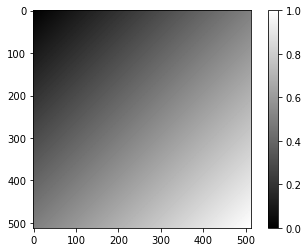

In [22]:
from astropy.io import fits
import matplotlib.pyplot as plt

data = fits.getdata('yourfile.fits')
plt.imshow(data, cmap='gray')
plt.colorbar()
plt.show()


In [25]:
from pyraf import iraf

# Load the required IRAF package
iraf.noao()
iraf.onedspec()

# Run the mk1dspec command
iraf.mk1dspec('arc', title="Arc lines", cont=0, peak=500, nl=30)


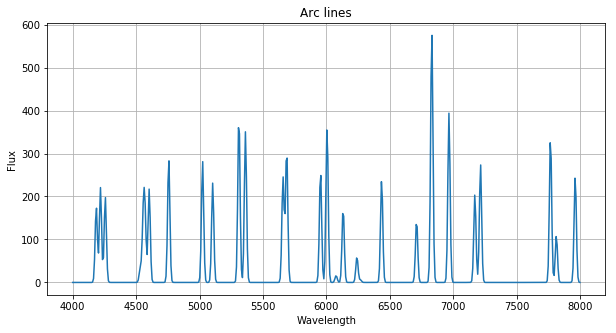

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# Open the synthetic spectrum and read the data
with fits.open('arc.fits') as hdul:
    data = hdul[0].data
    header = hdul[0].header

# Generate a wavelength array based on header information
wavelength = header['CRVAL1'] + header['CDELT1'] * np.arange(header['NAXIS1'])

# Plot the spectrum
plt.figure(figsize=(10, 5))
plt.plot(wavelength, data)
plt.title("Arc lines")
plt.xlabel("Wavelength")
plt.ylabel("Flux")
plt.grid(True)
plt.show()


This code was run in the visual code terminal after the docker had been brought down, it should be local, the astrodome repo was opened in vscode too. The dockerfile in astrodome was my attempt at creating a docker container and failed because NOAO no longer supports downloading binaries. May be possible to build from source. 

```bash
docker run -i -t -p 8888:8888 -v "$(pwd)":/opt/notebooks michaelcs/astrocondairaf /bin/bash -c "/opt/conda/bin/conda install -n iraf27 jupyter -y --quiet && source activate iraf27 && /opt/conda/envs/iraf27/bin/jupyter notebook --notebook-dir=/opt/notebooks --ip='*' --port=8888 --no-browser && /opt/conda/envs/iraf27/bin/jupyter notebook list"
```

the Jupyter Notebook is running at: http://[all ip addresses on your system]:8888/?token=9c1e0ef7c66c25d3e5f310165648f5e37c2e52208ab44eb5

Copy/paste this URL into your browser when you connect for the first time,
    to login with a token:
        http://localhost:8888/?token=9c1e0ef7c66c25d3e5f310165648f5e37c2e52208ab44eb5
        
        